# Autoassociative Artificual Neural Network

## Multi-Layer Perceptron

* **Multi-layer perceptron** is a type of network where multiple layers of a group of perceptron are stacked together to make a model.
* If we stack a bunch of perceptrons together, it becomes a hidden layer (also known as Dense layer). 

$$
f(X) = W \cdot X + \overrightarrow{b}
$$

* The dense layer uses a linear function, and any combination of linear function only results in the linear output.
* To add the flexbility to learn non-linear decision boundaries, we need to introduce an **activation function**.
* Activation functions can include:
    * Sigmoid or Logistic
    * ReLU
    * Tanh   
* The Rectified Linear Units (ReLU) is a popular activation function that is zero for any input value below zero and the same value for values greater than zero.

$$
f(X) = max(0, X)
$$


In [1]:
# ===== # IMPORTS # ===== #
import sys
import os
import keras
import numpy as np
import scipy.io as scio
import matplotlib.pyplot as plt
%matplotlib inline

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

Using TensorFlow backend.


In [39]:
# ===== # LOAD DATA # ===== #
print(scio.whosmat('../data/input.mat'))
data = scio.matlab.loadmat('../data/input.mat')
X = data['examples']
Y = data['labels']
print('Examples (X) shape: {}'.format(X.shape))
print('Labels (Y) shape: {}'.format(Y.shape))


[('examples', (50, 253692), 'double'), ('labels', (50, 1), 'double')]
Examples (X) shape: (50, 253692)
Labels (Y) shape: (50, 1)


## An Example

In [2]:
%run ../models/aann
from models.aann import *

# ===== # MNIST EXAMPLE # ===== #
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

flatten = True

# normalize x
X_train = X_train.astype(float) / 255.
X_test = X_test.astype(float) / 255.

# we reserve the last 10,000 traiing examples for validation
X_train, X_val = X_train[:-10000], X_train[-10000:]
y_train, y_val = y_train[:-10000], y_train[-10000:]

if flatten:
    X_train = X_train.reshape([X_train.shape[0], -1])
    X_val = X_val.reshape([X_val.shape[0], -1])
    X_test = X_test.reshape([X_test.shape[0], -1])

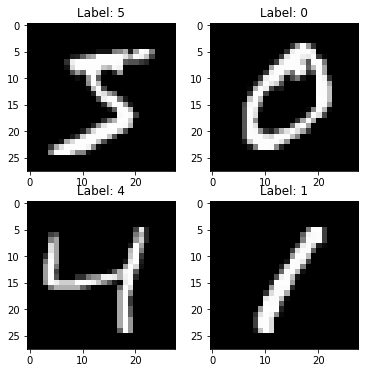

In [34]:
# lets look at some examples
plt.figure(figsize=(6,6))

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.title('Label: {}'.format(y_train[i]))
    plt.imshow(X_train[i].reshape([28,28]), cmap='gray')

In [3]:
mlp = MLP()
mlp.add(Dense(X_train.shape[1], 100))
mlp.add(ReLU())
mlp.add(Dense(100, 200))
mlp.add(ReLU())
mlp.add(Dense(200, 10))

In [4]:
from tqdm import trange
from IPython.display import clear_output

def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert len(inputs) == len(targets)
    
    if shuffle:
        indices = np.random.permutation(len(inputs))
    
    for start_idx in trange(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice[start_idx:start_idx + batchsize]
        yield inputs[excerpt], targets[excerpt]

train_log = []
val_log = []

for epoch in range(25):
    for x_batch, y_batch in iterate_minibatches(X_train, y_train, batchsize=32, shuffle=True):
        mlp.train(x_batch, y_batch)
#     mlp.train(X_train, y_train)
    
    train_log.append(np.mean(mlp.predict(X_train) == y_train))
    val_log.append(np.mean(mlp.predict(X_val) == y_val))
    
    clear_output()
    print('Epoch', epoch)
    print('Train accuracy:', train_log[-1])
    print('Validation accuracy:', val_log[-1])
    
    plt.plot(train_log, label='train accuracy')
    plt.plot(val_log, label='validation accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()


100%|██████████| 1562/1562 [00:02<00:00, 664.17it/s]


NameError: name 'predict' is not defined